# 1 - Entendimento do problema

## O projeto visa indicar qual perfil de investidor é mais adequado com base no comportamento do mercado de bitcoin. 

1.1 - Quais são os perfis de investidores?

- Conservadores, moderados e arrojados.

1.1.2 - Quais a bases fundamentais dos perfis? 

- Segurança
- Liquidez
- Rentabilidade

1.1.3 - Como influenciam no perfil dos investidores?


1.1.4 - Quais são os indicadores determinantes para a tomada de decisão?
- OBV - On Balance Volume
- Move average crossover





#2 - Coleta de dados e referências do projeto

Conjunto de dados utilizado:

 https://www.kaggle.com/mczielinski/bitcoin-historical-data

Referências:

https://www.notion.so/https-towardsdatascience-com-dynamic-cryptocurrency-trading-backtesting-platform-python-219dfcd742-eb894aef1a504d6fb363e3854f870350

https://towardsdatascience.com/basic-time-series-analysis-and-trading-strategy-with-bitcoin-price-data-1a8f1a30f11


# 3 - Análise, interpretação e Visualização 


Bibliotecas utilizadas


In [1]:
#manipulação de dados
import pandas as pd
import numpy as np
from scipy.stats import norm


#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4821511,1614996900,48362.00,48396.43,48362.00,48391.21,0.846486,40949.758889,48376.167174
4821512,1614996960,48383.17,48447.21,48383.17,48441.99,0.503095,24370.418563,48440.942159
4821513,1614997020,48459.00,48462.50,48377.55,48384.22,0.976677,47291.371758,48420.705795
4821514,1614997080,48384.22,48424.54,48384.22,48405.72,0.828068,40079.892079,48401.670701


Primeria inspecção dos dados 


In [4]:
#cinco primeiras observações do dataframe
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Inspecionando o tamanho do dataframe
df.size

38572128

In [6]:
#Inspecionando a forma do df.
df.shape

(4821516, 8)

In [7]:
df.loc[df["Volume_(BTC)"]==1098.3493842]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4404691,1589987700,9724.89,9724.89,9100.0,9685.57,1098.349384,1.044599e+07,9510.6238


In [8]:
#Informações iniciais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821516 entries, 0 to 4821515
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 294.3 MB


In [9]:
#verificando o tipo dos dados
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [10]:
#obtendo informações estatísticas iniciais. 
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.821516e+06,3.577991e+06,3.577991e+06,3.577991e+06,3.577991e+06,3.577991e+06,3.577990e+06,3.577990e+06
mean,1.470224e+09,5.512366e+03,5.516392e+03,5.508132e+03,5.512343e+03,9.382192e+00,4.026868e+04,5.512278e+03
std,8.365963e+07,7.532508e+03,7.539236e+03,7.525511e+03,7.532559e+03,3.068986e+01,1.475376e+05,7.532254e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.397641e+09,4.409300e+02,4.410900e+02,4.406300e+02,4.409300e+02,4.068310e-01,4.419355e+02,4.409000e+02
50%,1.470352e+09,3.545610e+03,3.546890e+03,3.544230e+03,3.545670e+03,1.988373e+00,3.666958e+03,3.545441e+03
75%,1.542674e+09,8.473935e+03,8.479940e+03,8.468340e+03,8.473690e+03,7.335866e+00,2.463509e+04,8.474019e+03
max,1.614997e+09,5.834554e+04,5.835414e+04,5.832656e+04,5.835414e+04,5.853852e+03,1.390067e+07,5.833830e+04


In [11]:
#Menores valores do bitcoin no presente conjunto de dados 
df.min()

Timestamp            1.325318e+09
Open                 3.800000e+00
High                 3.800000e+00
Low                  1.500000e+00
Close                1.500000e+00
Volume_(BTC)         0.000000e+00
Volume_(Currency)    0.000000e+00
Weighted_Price       3.800000e+00
dtype: float64

In [12]:
#Maiores valores do bitcoin no presente conjunto de dados
df.max() 

Timestamp            1.614997e+09
Open                 5.834554e+04
High                 5.835414e+04
Low                  5.832656e+04
Close                5.835414e+04
Volume_(BTC)         5.853852e+03
Volume_(Currency)    1.390067e+07
Weighted_Price       5.833830e+04
dtype: float64

In [13]:
#dados faltantes, total de 1243608 observações em branco.
df.isnull().sum()

Timestamp                  0
Open                 1243525
High                 1243525
Low                  1243525
Close                1243525
Volume_(BTC)         1243525
Volume_(Currency)    1243526
Weighted_Price       1243526
dtype: int64

#Mudando formato da feature Timestamp

O modo como a feature se apresenta não é funcional para o interesse desse projeto. Mudando para o formato Y-m-d e o nome da feature. 


In [14]:
#mudando a feature timestamp para formato dd/mm/aa
df["Timestamp"]=pd.to_datetime(df["Timestamp"], unit="s")



In [15]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4821511,2021-03-06 02:15:00,48362.00,48396.43,48362.00,48391.21,0.846486,40949.758889,48376.167174
4821512,2021-03-06 02:16:00,48383.17,48447.21,48383.17,48441.99,0.503095,24370.418563,48440.942159
4821513,2021-03-06 02:17:00,48459.00,48462.50,48377.55,48384.22,0.976677,47291.371758,48420.705795
4821514,2021-03-06 02:18:00,48384.22,48424.54,48384.22,48405.72,0.828068,40079.892079,48401.670701
4821515,2021-03-06 02:19:00,48433.28,48464.89,48428.09,48464.89,1.000000,NaN,NaN


In [17]:
df["Timestamp"].dtype

dtype('<M8[ns]')

In [18]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"], format= "%Y-%m-%d")


In [19]:
#Tipo do dado foi alterado
df.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

Correlção


In [20]:
#correlação entre as features
corr=df.corr()
corr

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999999,0.999999,0.999998,-0.049494,0.359284,0.999999
High,0.999999,1.000000,0.999998,0.999999,-0.049324,0.359756,0.999999
Low,0.999999,0.999998,1.000000,0.999999,-0.049708,0.358689,0.999999
Close,0.999998,0.999999,0.999999,1.000000,-0.049514,0.359244,0.999999
Volume_(BTC),-0.049494,-0.049324,-0.049708,-0.049514,1.000000,0.361116,-0.049526
Volume_(Currency),0.359284,0.359756,0.358689,0.359244,0.361116,1.000000,0.359209
Weighted_Price,0.999999,0.999999,0.999999,0.999999,-0.049526,0.359209,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

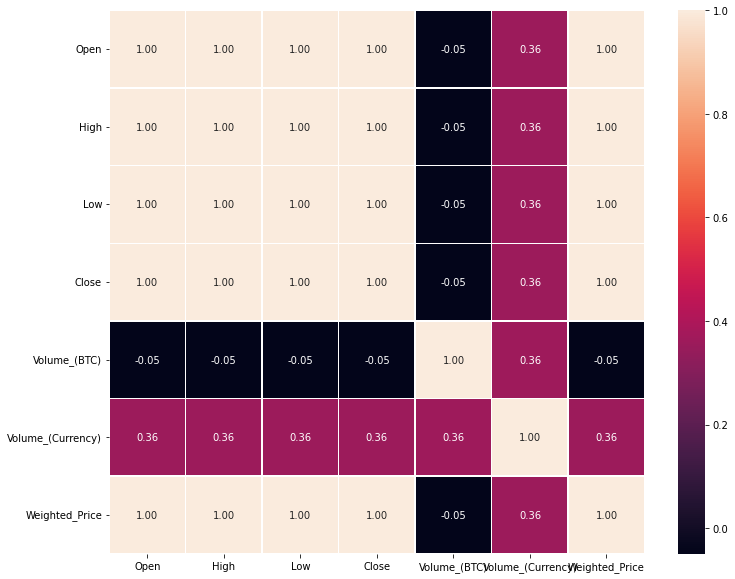

In [21]:
plt.figure(figsize=(12,10))
corr
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f",cmap="rocket")
plt.xticks(rotation=0)

#Correlação entre as features.

1 - Open, high, low e close têm entre si grande correlação. (esperado).

2 - BTC e  CURRENCY têm moderada correlação entre si, baixa com as demais features. 

3 - WEIGHTED PRICE tem alta correlação com as features open, high, low e close. E baixa com as features BTC E CURRENCY. 





##Dicionário de dados

1 - Timestamp - Hora de início da janela. Janelas de 60s em unidade de time unix. Tipo - int. Alterado para datetime.

2 - Open - Valor de abertura no início da janela. Tipo de dado - float.

3 - High - Valor mais alto durante a janela. Tipo de dado - float.

4 - Low - Valor mais baixo durante a janela. Tipo de dado - float. 

5 - Close - Valor no fechamento da janela. Tipo de dado - float. 

6 - Volume BTC - Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.

7 - Volume currency - Volume total de cryptomoedas transacionadas na respectiva janela. Tipo de dado - float.

8 - Weighted Price - VWAP - Preço médio ponderado por volume. É obtido da razão entre o somatório do produto do número de bitcoin comprado pelo preço, e o total de bitcoin comprado. Tipo de dado - float.  

#Dados faltantes e duplicatas.

A abordagem adotada com relação aos NaN presentes no conjunto de dados foi de, a princípio, não leva-los em consideração deste ponto em diante. Devido ao fato de serem apenas dados faltantes que não deverão influenciar no presente projeto.




#Percentual de dados faltantes

O conjunto de dados tem 25,6% de dados faltantes.

In [22]:
#Verificando de dados faltantes no conjunto de dados 
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4821511,False,False,False,False,False,False,False,False
4821512,False,False,False,False,False,False,False,False
4821513,False,False,False,False,False,False,False,False
4821514,False,False,False,False,False,False,False,False


In [23]:
#Quantidade de dados faltantes por feature
df.isnull().sum()

Timestamp                  0
Open                 1243525
High                 1243525
Low                  1243525
Close                1243525
Volume_(BTC)         1243525
Volume_(Currency)    1243526
Weighted_Price       1243526
dtype: int64

In [24]:
#Separando colunas e linhas do df
df.shape

(4821516, 8)

In [25]:
#Salvando as informações de linhas e colunas em variáveis para melhor manipulação 
linhas, colunas = df.shape

In [26]:
#Verificando o percentual de dados faltantes no df e salvando numa respectiva variável
percentual_faltantes = (df.isnull().sum()/linhas)*100

In [27]:
percentual_faltantes

Timestamp             0.000000
Open                 25.791162
High                 25.791162
Low                  25.791162
Close                25.791162
Volume_(BTC)         25.791162
Volume_(Currency)    25.791183
Weighted_Price       25.791183
dtype: float64

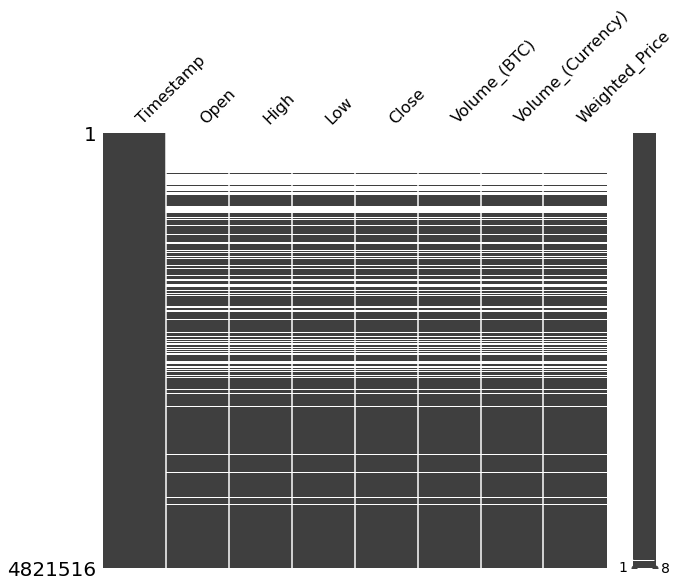

In [28]:
#Visualizando os dados faltantes
msno.matrix(df, figsize=(10,8))

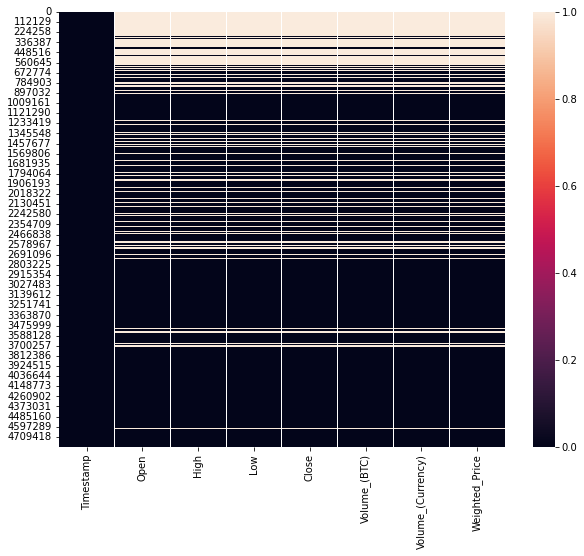

In [29]:
#Visualizando com mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [30]:
#Cópia do df para exclusão dos faltantes.
df_sem_faltantes= df.copy()

In [31]:
#Df a ser trabalho em diante. 
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Excluindo os dados faltantes (NaN)
df_sem_faltantes.dropna(inplace=True)

In [33]:
#Nova forma (tamanho) do dataframe
df_sem_faltantes.shape

(3577990, 8)

In [34]:
#Forma do novo dataframe sem os dados faltantes 
df_sem_faltantes.size

28623920

In [35]:
#Verificando
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [36]:
df_sem_faltantes.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4821510,2021-03-06 02:14:00,48399.55,48399.55,48361.27,48361.27,0.747287,36140.226989,48361.913705
4821511,2021-03-06 02:15:00,48362.00,48396.43,48362.00,48391.21,0.846486,40949.758889,48376.167174
4821512,2021-03-06 02:16:00,48383.17,48447.21,48383.17,48441.99,0.503095,24370.418563,48440.942159
4821513,2021-03-06 02:17:00,48459.00,48462.50,48377.55,48384.22,0.976677,47291.371758,48420.705795
4821514,2021-03-06 02:18:00,48384.22,48424.54,48384.22,48405.72,0.828068,40079.892079,48401.670701


In [37]:
#Verificando em todo o dataframe.
df_sem_faltantes.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

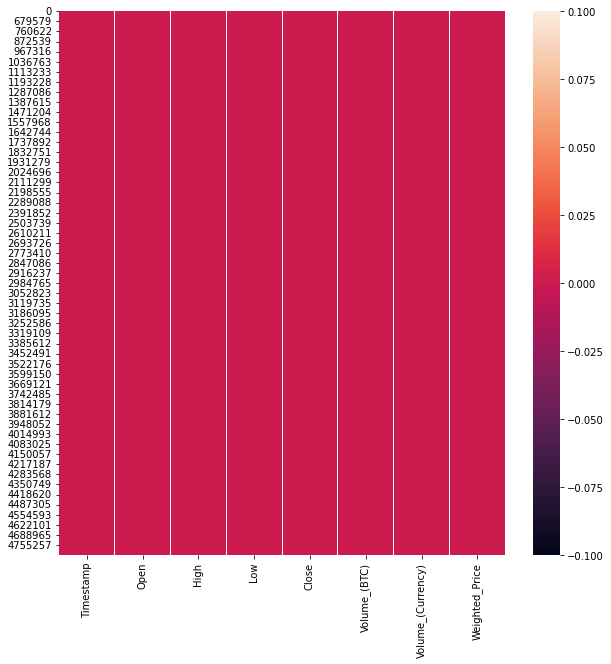

In [38]:
#Visualizando
plt.figure(figsize=(10,10))
sns.heatmap(df_sem_faltantes.isnull())

In [39]:
#Verificando para dados duplicados
df_sem_faltantes.duplicated().sum()

0

#Outliers

A estratégia adotada para a detecção de outliers foi a visualização em box plot de uma das features. Contudo, dada a extensão e natureza dos dados, optou-se por realizar as visualizações subsequêntes com uma parcela recente dos dados, que corresponde ao perído de 1 ano,  a fim de evitar discrepâncias desnecessárias. 





In [40]:
#Recorte dos dados para um perído de 1 ano
df_rec_analise = df_sem_faltantes.loc[df_sem_faltantes["Timestamp"] >= "2020-03-31 00:00:00"]

In [41]:
df_rec_analise.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4331776,2020-03-31 00:00:00,6408.95,6408.95,6397.52,6397.65,0.369580,2366.046893,6401.994344
4331777,2020-03-31 00:01:00,6399.20,6406.06,6398.80,6405.06,4.053499,25960.527673,6404.473810
4331778,2020-03-31 00:02:00,6409.05,6425.24,6409.05,6425.00,18.707374,120144.266210,6422.294481
4331779,2020-03-31 00:03:00,6417.53,6430.74,6417.53,6426.53,7.164653,46043.367355,6426.461704
4331780,2020-03-31 00:04:00,6426.54,6438.96,6424.46,6438.96,9.050250,58225.624105,6433.592825


In [42]:
df_rec_analise.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,482164.000000,482164.000000,482164.000000,482164.000000,482164.000000,4.821640e+05,482164.000000
mean,17518.219043,17530.762651,17505.529917,17518.442750,6.126882,1.146092e+05,17518.220306
std,12437.664947,12451.238920,12423.567863,12437.800917,15.292625,2.997170e+05,12436.839415
min,6162.030000,6171.690000,6137.710000,6158.120000,0.000002,1.567074e-02,6148.417195
25%,9429.950000,9433.690000,9427.380000,9430.300000,0.485906,5.771940e+03,9430.375287
50%,11401.710000,11405.670000,11398.235000,11401.670000,1.973613,2.960274e+04,11402.298924
75%,19264.225000,19274.527500,19252.420000,19264.630000,5.889323,1.013395e+05,19264.635280
max,58345.540000,58354.140000,58326.560000,58354.140000,1098.349384,1.390067e+07,58338.304421


In [43]:
#valores mínimos no conjunto de dados para análise 
df_rec_analise.min()

Timestamp            2020-03-31 00:00:00
Open                             6162.03
High                             6171.69
Low                              6137.71
Close                            6158.12
Volume_(BTC)                    2.02e-06
Volume_(Currency)              0.0156707
Weighted_Price                   6148.42
dtype: object

In [44]:
#Valores máximos no conjunto de dados para análise 
df_rec_analise.max()

Timestamp            2021-03-06 02:18:00
Open                             58345.5
High                             58354.1
Low                              58326.6
Close                            58354.1
Volume_(BTC)                     1098.35
Volume_(Currency)            1.39007e+07
Weighted_Price                   58338.3
dtype: object

**Outliers na feature Open**


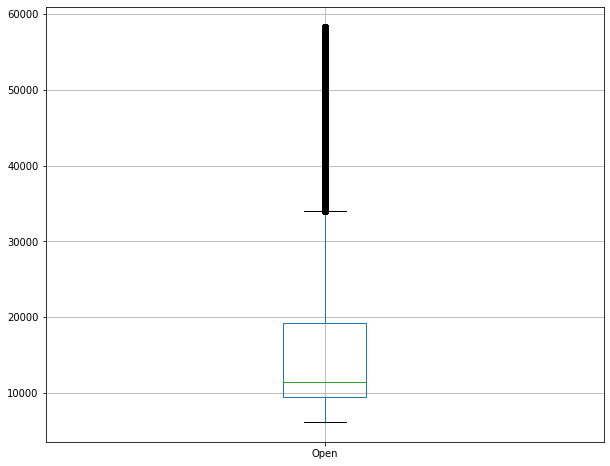

In [45]:
#Verificando a existência de outliers através de visulização em box plot
plt.figure(figsize=[10,8])
boxplot = df_rec_analise.boxplot(column=['Open'])



In [46]:
#Calculando intervalo interquartil
q1= df_rec_analise["Open"].quantile(0.25)
q3= df_rec_analise["Open"].quantile(0.75)
IQL= q3 - q1
print(IQL)

9834.275000000001


In [47]:
#Estabelecendo os limites superior e inferior
LS = q3+1.5*IQL
LI = q1-1.5*IQL
print(LS)
print(LI)

34015.637500000004
-5321.4625000000015


In [48]:
#Verificando os pontos de máximo e mínimo das observações
df_rec_analise["Open"].describe()

count    482164.000000
mean      17518.219043
std       12437.664947
min        6162.030000
25%        9429.950000
50%       11401.710000
75%       19264.225000
max       58345.540000
Name: Open, dtype: float64

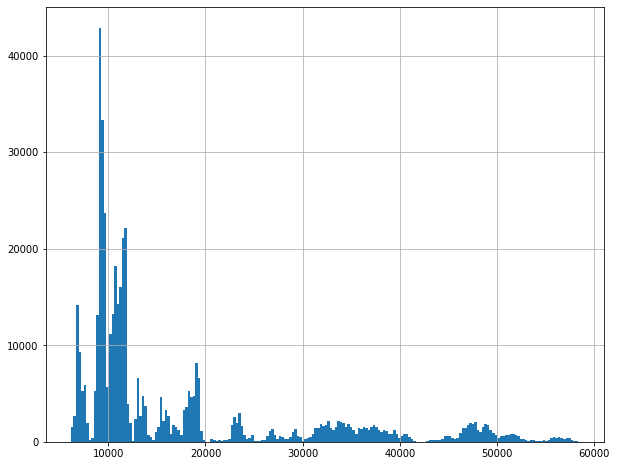

In [49]:
plt.figure(figsize=(10,8))
df_rec_analise["Open"].hist(bins=200)

In [50]:
#Visualizando dados discrepantes
dados_discrepantes_open = df_rec_analise["Open"].loc[df_rec_analise["Open"] >= 57368.4425]

In [51]:
dados_discrepantes_open

4801980    57431.43
4801981    57517.31
4801983    57419.37
4801984    57371.00
4801993    57440.44
             ...   
4804096    57485.74
4804097    57548.41
4804098    57473.21
4804099    57530.71
4804100    57441.12
Name: Open, Length: 594, dtype: float64

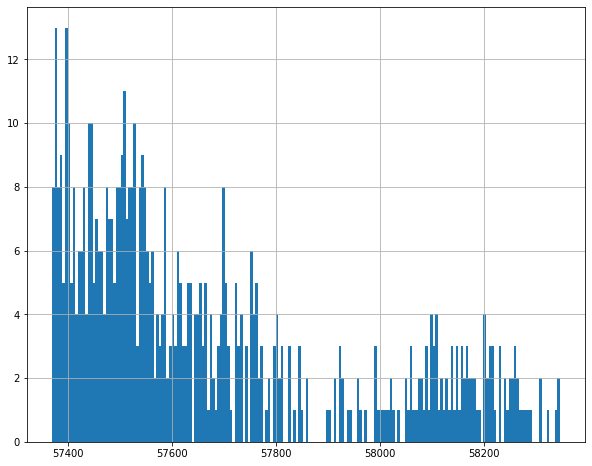

In [52]:
#Visualizando graficamente os dados discrepantes
plt.figure(figsize=(10,8))
dados_discrepantes_open.hist(bins=200)

**Outliers na feature High**

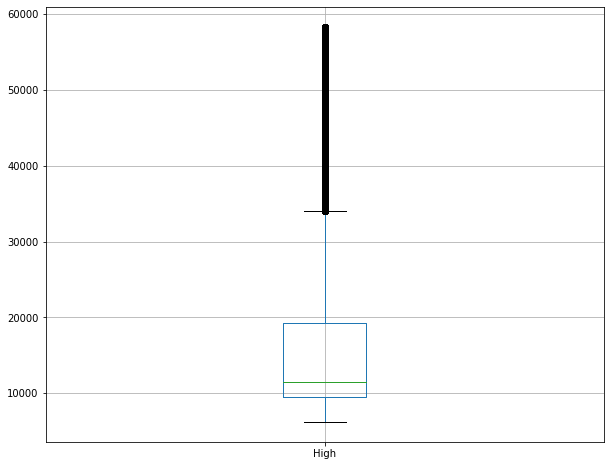

In [53]:
#Outliers com base na feature high
plt.figure(figsize=[10,8])
boxplot_high=df_rec_analise.boxplot(column=["High"])

In [54]:
#definindo intervalo interquartílico 
q1= df_rec_analise["High"].quantile(0.25)
q3= df_rec_analise["High"].quantile(0.75)
IQL= q3 - q1
print(IQL)

9840.8375


In [55]:
#definindo os limites superior e inferior
#Os limites são LS=57419.44 e LI=3.80  
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

34035.78375
-5327.566249999998


In [56]:
#Dados discrepantes da feature "High"
dados_discrepantes_high = df_rec_analise["High"].loc[df_rec_analise["High"] >= 57419.44000000001]

In [57]:
dados_discrepantes_high

4801978    57474.16
4801979    57467.24
4801980    57549.91
4801981    57553.81
4801982    57482.19
             ...   
4804096    57558.69
4804097    57550.27
4804098    57496.10
4804099    57564.19
4804100    57442.46
Name: High, Length: 560, dtype: float64

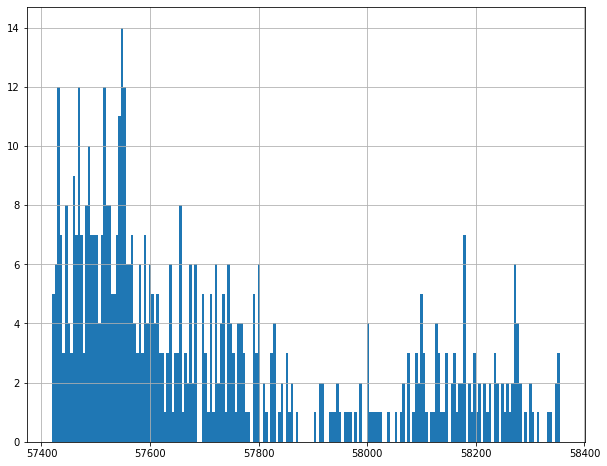

In [58]:
#Visualizando com histograma
plt.figure(figsize=(10,8))
dados_discrepantes_high.hist(bins=200)

**Outliers para a feature Low**

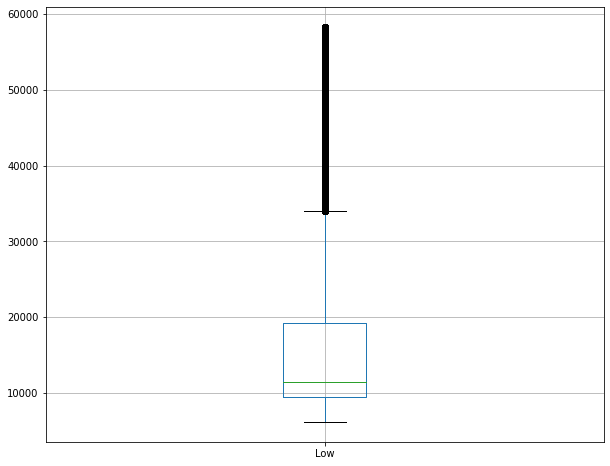

In [59]:
#Definindo o boxplot para a feature
plt.figure(figsize=[10,8])
boxplot=df_rec_analise.boxplot(column="Low")

In [60]:
#Definindo intervalo interquartilico 
q3=df_rec_analise["Low"].quantile(0.75)
q1=df_rec_analise["Low"].quantile(0.25)
IQL= q3-q1
IQL

9825.039999999999

In [61]:
#Limites superior e inferior da feature Low
#Os limites são LS=57287.96000000001, LI=1.50
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

33989.979999999996
-5310.1799999999985


In [62]:
#Dados discprepantes da fearture Low
dados_discrepantes_Low = df_rec_analise["Low"].loc[df_rec_analise["Low"] >= 57287.96000000001]


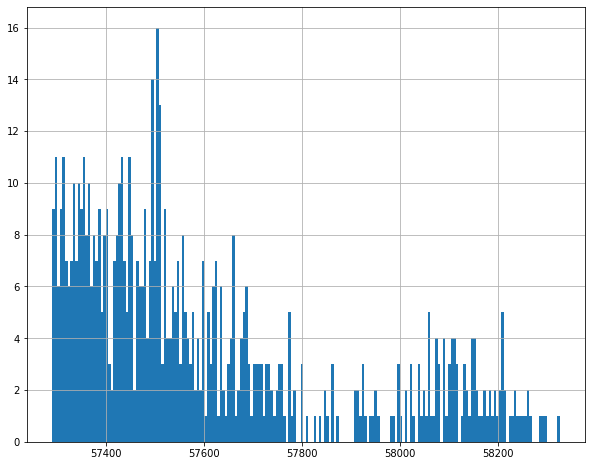

In [63]:
#Visualisando os dados discrepantes com histograma
plt.figure(figsize=(10,8))
dados_discrepantes_Low.hist(bins=200)

**Outliers para a feature Close**

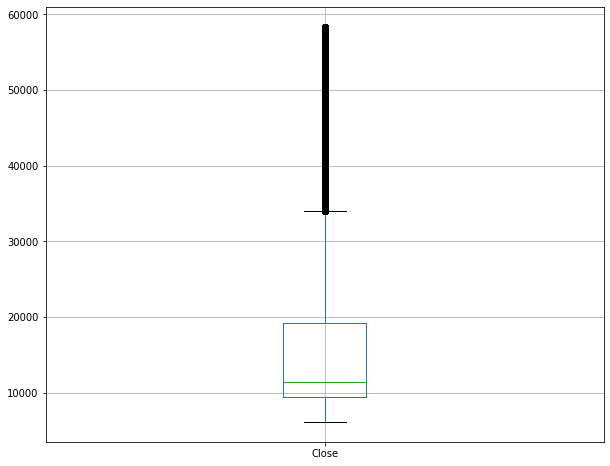

In [64]:
#Boxplot para a feature close
plt.figure(figsize=[10,8])
boxplot_close=df_rec_analise.boxplot(column="Close")

In [65]:
#definindo intervalo interquartílico 
q3=df_rec_analise["Close"].quantile(0.75)
q1=df_rec_analise["Close"].quantile(0.25)
IQL = q3-q1
IQL

9834.330000000002

In [66]:
#Estabelecendo os limites superior e inferior. LS=57363.24, LI=6158.12.
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

34016.125
-5321.195000000003


In [67]:
#Outliers para a feature Close 
dados_discrepantes_close=df_rec_analise["Close"].loc[df_rec_analise["Close"]>=57363.240000000005]

In [68]:
#dados discrepantes na feature Close
dados_discrepantes_close

4801979    57434.11
4801980    57515.22
4801982    57411.78
4801983    57371.03
4801985    57380.58
             ...   
4804095    57492.91
4804096    57555.99
4804097    57473.16
4804098    57427.51
4804099    57520.07
Name: Close, Length: 609, dtype: float64

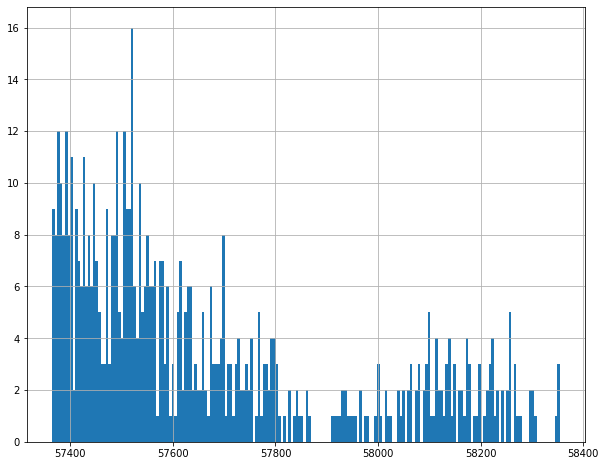

In [69]:
#Histograma
plt.figure(figsize=[10,8])
dados_discrepantes_close.hist(bins=200)
plt.show()

**Outliers para a feature Volume_(BTC)**

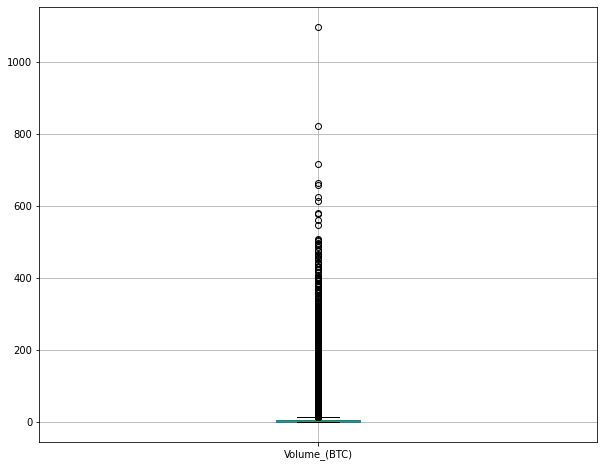

In [70]:
#Boxplot
plt.figure(figsize=[10,8])
boxplot_VolumeBTC=df_rec_analise.boxplot(column="Volume_(BTC)")


In [71]:
#Intervalo interquartil 
q3=df_rec_analise["Volume_(BTC)"].quantile(0.75)
q1=df_rec_analise["Volume_(BTC)"].quantile(0.25)
IQL=q3-q1
IQL

5.40341749

In [72]:
#Estabelecendo limites superior e inferior. LS=13.459081675, LI=2.02e-06
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

13.994449435
-7.619220525


In [73]:
df_rec_analise["Volume_(BTC)"].max()    

1098.3493842

In [74]:
df_rec_analise["Volume_(BTC)"].min()

2.02e-06

In [75]:
#dados discrepantes para a feature Volume_(BTC)
dados_discrepantes_VolumeBTC=df_rec_analise["Volume_(BTC)"].loc[df_rec_analise["Volume_(BTC)"]>=13.459081675]

In [76]:
dados_discrepantes_VolumeBTC

4331778    18.707374
4331782    20.546321
4331803    28.450407
4331831    18.384845
4331892    28.659927
             ...    
4821286    24.625556
4821288    29.304260
4821426    14.880885
4821502    21.995985
4821505    16.579431
Name: Volume_(BTC), Length: 51623, dtype: float64

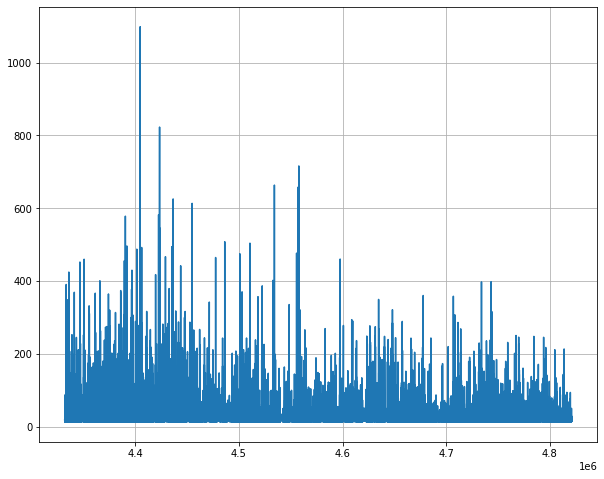

In [77]:
#Histograma
plt.figure(figsize=[10,8])
dados_discrepantes_VolumeBTC.plot(kind="line", grid=True)
plt.show()

**Outliers da feature Volume_(Currency)**

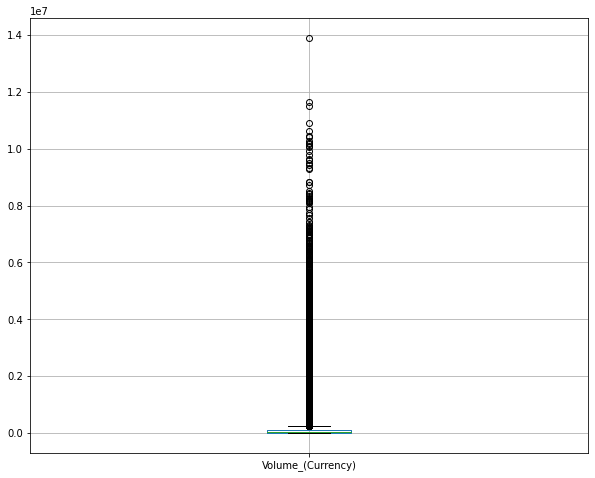

In [78]:
#boxplot 
plt.figure(figsize=(10,8))
boxplot_VolumeC=df_rec_analise.boxplot(column=["Volume_(Currency)"])

In [79]:
#intervalo interquartil 
q3=df_rec_analise["Volume_(Currency)"].quantile(0.75)
q1=df_rec_analise["Volume_(Currency)"].quantile(0.25)
IQL=q3-q1
IQL

95567.59674485

Muitos outliers nas features de volume. Análise separada?

In [80]:
#limites. LS=261898.55319500001, LI=0.0156707418
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

244690.932249775
-137579.45472962502


In [81]:
df_rec_analise["Volume_(Currency)"].max()

13900672.407

In [82]:
df_rec_analise["Volume_(Currency)"].min()

0.0156707418

In [83]:
#dados discrepantes para a feature Volume_(Currency)
dados_discrepantes_VolumeC=df_rec_analise["Volume_(Currency)"].loc[df_rec_analise["Volume_(Currency)"]>=261898.55319500001]

In [84]:
dados_discrepantes_VolumeC

4332368    3.393816e+05
4332371    3.436030e+05
4332372    3.338428e+05
4332423    3.264766e+05
4332424    5.707756e+05
               ...     
4821329    2.663410e+05
4821426    7.262035e+05
4821442    4.712081e+05
4821502    1.066740e+06
4821505    8.007320e+05
Name: Volume_(Currency), Length: 50449, dtype: float64

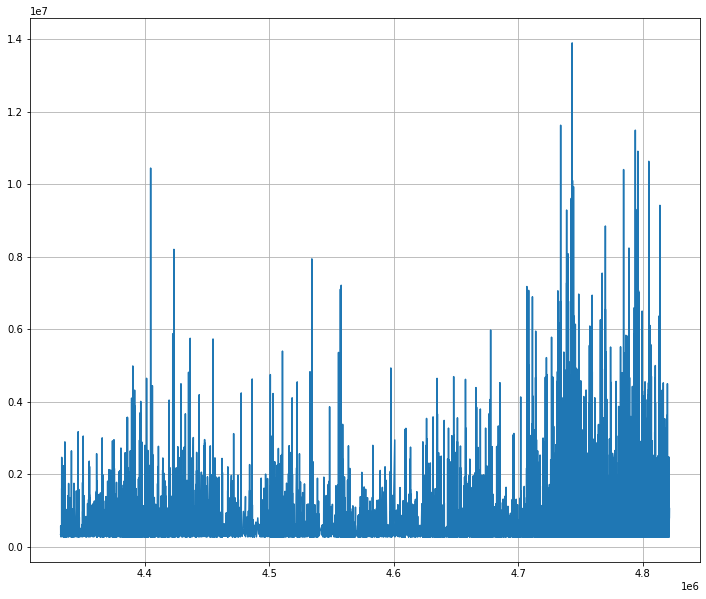

In [85]:
#visualisando
plt.figure(figsize=(12,10))
dados_discrepantes_VolumeC.plot(kind="line", grid=True)

**Outliers da feature Weighted_Price**

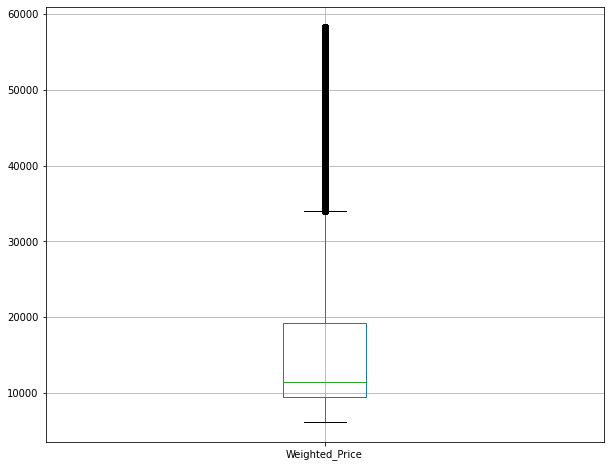

In [86]:
#Boxplot
plt.figure(figsize=[10,8])
boxplot_Weighted_Price=df_rec_analise.boxplot(column="Weighted_Price")

In [87]:
#intervalo interquartil 
q3=df_rec_analise["Weighted_Price"].quantile(0.75)
q1=df_rec_analise["Weighted_Price"].quantile(0.25)
IQL=q3-q1
IQL

9834.25999235

In [88]:
#limites superior e inferior. LS=57349.1936412, LI=6148.417195
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

34016.025268275
-5321.014701124999


In [89]:
#Dados discrepantes
dados_discrepantes_Weighted_Price=df_rec_analise["Weighted_Price"].loc[df_rec_analise["Weighted_Price"]>=57349.1936412]


In [90]:
dados_discrepantes_Weighted_Price

4801978    57401.019507
4801979    57394.408526
4801980    57503.365779
4801981    57475.037453
4801982    57429.726218
               ...     
4804095    57495.214912
4804096    57526.574979
4804097    57521.083264
4804098    57455.667221
4804099    57540.315393
Name: Weighted_Price, Length: 627, dtype: float64

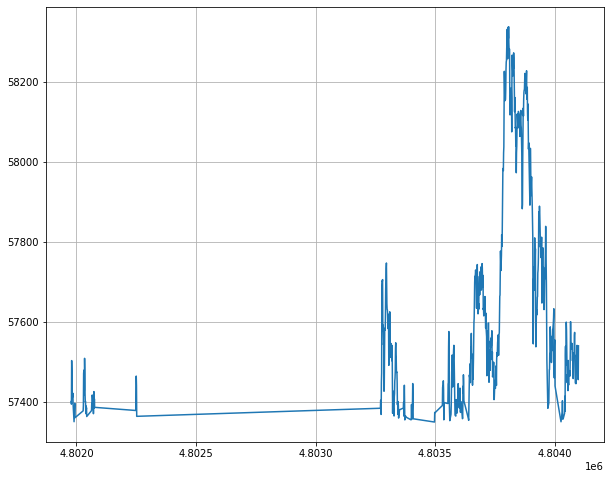

In [91]:
#Visualização
plt.figure(figsize=[10,8])
dados_discrepantes_Weighted_Price.plot( grid=True)
plt.show()

#Análise das features

Date_time:
  Hora de início da janela. Janelas de 60s em unidade de time unix inicialmente, modificado para o formato data e hora. Com intervalos de 60s entre as observações. 

In [92]:
df_rec_analise["Timestamp"]

4331776   2020-03-31 00:00:00
4331777   2020-03-31 00:01:00
4331778   2020-03-31 00:02:00
4331779   2020-03-31 00:03:00
4331780   2020-03-31 00:04:00
                  ...        
4821510   2021-03-06 02:14:00
4821511   2021-03-06 02:15:00
4821512   2021-03-06 02:16:00
4821513   2021-03-06 02:17:00
4821514   2021-03-06 02:18:00
Name: Timestamp, Length: 482164, dtype: datetime64[ns]

In [93]:
#Verificando o tipo
df_rec_analise["Timestamp"].dtypes

dtype('<M8[ns]')

In [94]:
#Verificando dados faltantes
df_rec_analise["Timestamp"].isnull().sum()

0

In [95]:
#Informações estátisticas sobre a feature
df_rec_analise["Timestamp"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  482164
unique                 482164
top       2020-08-21 19:42:00
freq                        1
first     2020-03-31 00:00:00
last      2021-03-06 02:18:00
Name: Timestamp, dtype: object

#Open

Valor de abertura da janela. 


In [96]:
df_rec_analise["Open"]

4331776     6408.95
4331777     6399.20
4331778     6409.05
4331779     6417.53
4331780     6426.54
             ...   
4821510    48399.55
4821511    48362.00
4821512    48383.17
4821513    48459.00
4821514    48384.22
Name: Open, Length: 482164, dtype: float64

In [97]:
#Informações estatísticas iniciais
df_rec_analise["Open"].describe()

count    482164.000000
mean      17518.219043
std       12437.664947
min        6162.030000
25%        9429.950000
50%       11401.710000
75%       19264.225000
max       58345.540000
Name: Open, dtype: float64

In [98]:
#Mediana
df_rec_analise["Open"].median()

11401.71

In [99]:
#Verificando para dados faltantes 
df_rec_analise["Open"].isnull().sum()

0

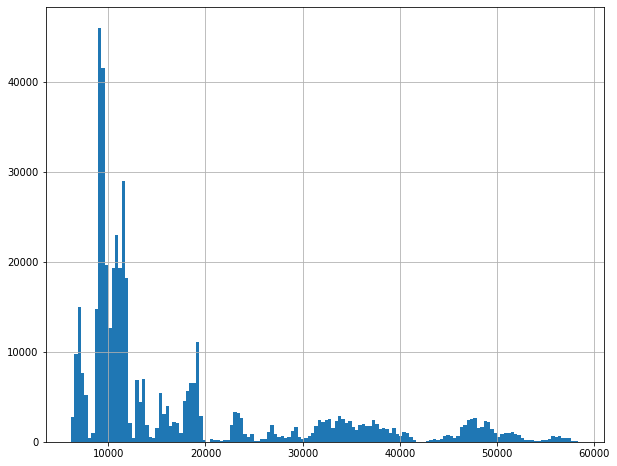

In [100]:
#Histograma
df_rec_analise["Open"].hist(bins=150, figsize=(10,8))

In [101]:
#Verificando a curtose da distribuição 
df_rec_analise["Open"].kurtosis()

1.1124994451664016

In [102]:
#Verificando a simetria da distribuição 
df_rec_analise["Open"].skew()

1.5109380514848196

In [103]:
#visualizando a distribuição com a densidade de probabilidade. (pdf)
x_list=np.linspace(df_rec_analise.Open.min(),df_rec_analise.Open.max(), 100)
y_list=norm.pdf(x_list,loc=df_rec_analise.Open.mean(), scale=df_rec_analise.Open.std())

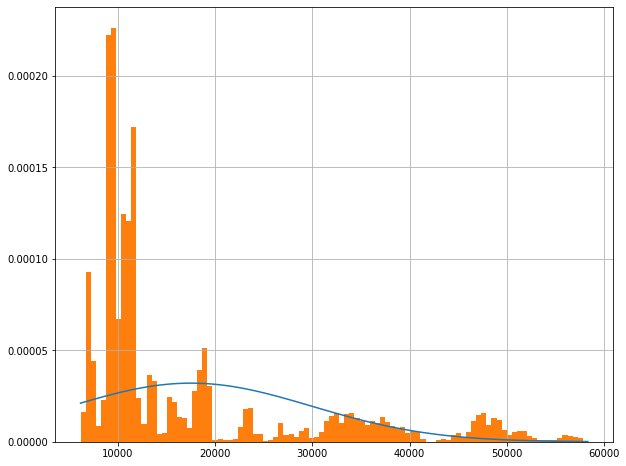

In [104]:
plt.plot(x_list,y_list)
df_rec_analise["Open"].hist(bins=100, figsize=(10,8), density=True)




In [105]:
#Valores mais frequêntes de abertura
df_rec_analise["Open"].value_counts()

11350.00    63
9170.00     62
9150.00     60
11400.00    53
11750.00    52
            ..
47927.55     1
24394.01     1
6679.00      1
18194.32     1
9082.89      1
Name: Open, Length: 359726, dtype: int64

#High

Maior valor obtido durante a janela. 

In [106]:
df_rec_analise["High"]

4331776     6408.95
4331777     6406.06
4331778     6425.24
4331779     6430.74
4331780     6438.96
             ...   
4821510    48399.55
4821511    48396.43
4821512    48447.21
4821513    48462.50
4821514    48424.54
Name: High, Length: 482164, dtype: float64

In [107]:
df_rec_analise["High"].describe()

count    482164.000000
mean      17530.762651
std       12451.238920
min        6171.690000
25%        9433.690000
50%       11405.670000
75%       19274.527500
max       58354.140000
Name: High, dtype: float64

In [108]:
#Maior valor dentre os máximos num intervalo de 1 ano.
df_rec_analise["High"].max()

58354.14

In [109]:
#Valor 3x maior que a média do ano. Algum evento atípico?
df_rec_analise["High"].max()/df_rec_analise["High"].mean()

3.3286709289832164

In [110]:
df_rec_analise.loc[df_rec_analise["High"] == 61781.83]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


NOTA:
2021-03-13 aprovado pacote de estímulos de 1,9 trilhão do governo Biden.


In [111]:
#Menor valor máximo do preço de bitcoin no último ano.
df_rec_analise["High"].min()

6171.69

In [112]:
df_rec_analise.loc[df_rec_analise["High"] == 6171.69]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4334226,2020-04-01 16:50:00,6171.69,6171.69,6137.71,6158.12,110.355978,678514.59289,6148.417195


2020-04-01: INÍCIO DA PANDEMIA DE COVID. 


In [113]:
#Valores mais frequêntes de máximo no intervalo de 1 ano. 
df_rec_analise["High"].value_counts()

11350.00    74
9700.00     73
11400.00    69
11362.14    64
9500.00     63
            ..
18913.82     1
18491.18     1
15649.58     1
16002.65     1
9082.89      1
Name: High, Length: 352651, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


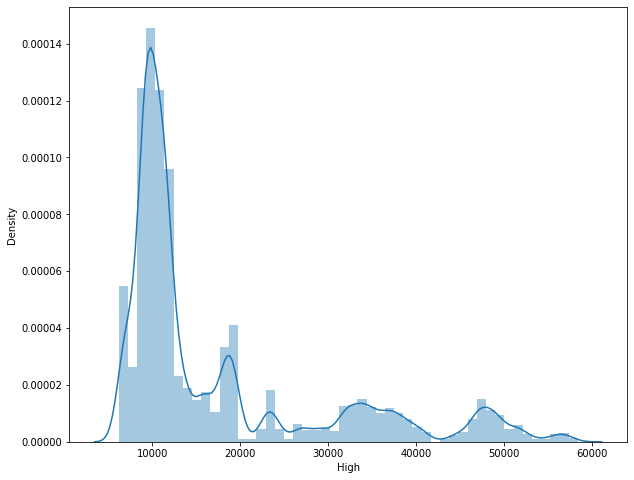

In [114]:
#Visulisando 
plt.figure(figsize=[10,8])
sns.distplot(df_rec_analise["High"])

In [115]:
#Calculando a curtose
df_rec_analise["High"].kurtosis()

1.1107619432494915

In [116]:
#Calculando a assimetria 
df_rec_analise["High"].skew()

1.5106949233139524

In [117]:
#Valores únicos na feature High
df_rec_analise["High"].nunique()

352651

In [118]:
df_rec_analise.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

#Low

 Low - Valor mais baixo durante a janela. Tipo de dado - float.



In [119]:
df_rec_analise["Low"]

4331776     6397.52
4331777     6398.80
4331778     6409.05
4331779     6417.53
4331780     6424.46
             ...   
4821510    48361.27
4821511    48362.00
4821512    48383.17
4821513    48377.55
4821514    48384.22
Name: Low, Length: 482164, dtype: float64

In [120]:
df_rec_analise["Low"].describe()

count    482164.000000
mean      17505.529917
std       12423.567863
min        6137.710000
25%        9427.380000
50%       11398.235000
75%       19252.420000
max       58326.560000
Name: Low, dtype: float64

In [121]:
df_rec_analise["Low"].dtypes

dtype('float64')

In [122]:
#Valor mais baixo atingido no intervalo de 1 ano
df_rec_analise["Low"].min()


6137.71

In [123]:
df_rec_analise["Low"].value_counts()

9600.00     74
9100.00     68
11350.00    66
9150.00     66
9170.00     65
            ..
17130.60     1
13066.73     1
8994.99      1
35956.04     1
32251.00     1
Name: Low, Length: 354526, dtype: int64

In [124]:
df_rec_analise["Low"].unique()

array([ 6397.52,  6398.8 ,  6409.05, ..., 48383.17, 48377.55, 48384.22])

In [125]:
#Valores únicos no preço
df_rec_analise["Low"].nunique()

354526

In [126]:
#valores repetidos no preço
df_rec_analise["Low"].duplicated().sum()

127638

In [127]:
df_rec_analise["Low"].duplicated().value_counts()

False    354526
True     127638
Name: Low, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


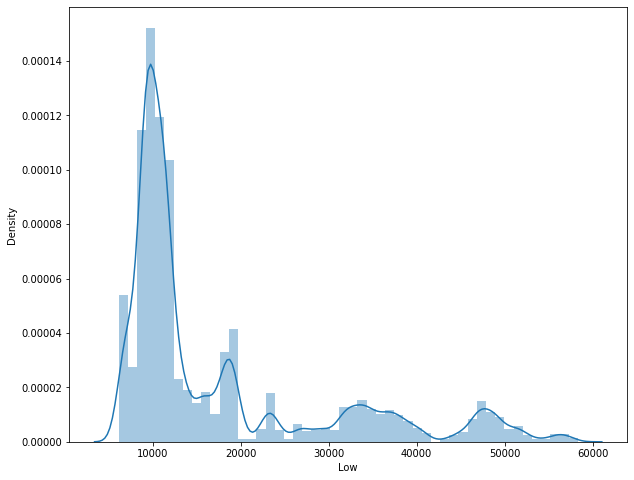

In [128]:
#Visualisando a distribuição 
plt.figure(figsize=[10,8])
sns.distplot(df_rec_analise["Low"])

##Close

Valor no fechamento da janela. Tipo de dado - float.

In [129]:
df_rec_analise["Close"]

4331776     6397.65
4331777     6405.06
4331778     6425.00
4331779     6426.53
4331780     6438.96
             ...   
4821510    48361.27
4821511    48391.21
4821512    48441.99
4821513    48384.22
4821514    48405.72
Name: Close, Length: 482164, dtype: float64

In [130]:
#Tipo do dado
df_rec_analise["Close"].dtypes

dtype('float64')

In [131]:
#Informações estatísticas iniciais
df_rec_analise["Close"].describe()

count    482164.000000
mean      17518.442750
std       12437.800917
min        6158.120000
25%        9430.300000
50%       11401.670000
75%       19264.630000
max       58354.140000
Name: Close, dtype: float64

In [132]:
#Maior valor de fechamento, coincide com o valor da feature High.
df_rec_analise["Close"].max()

58354.14

In [133]:
df_rec_analise.loc[df_rec_analise["Close"] == 61781.8]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


In [134]:
#Menor valor de fechamento. 
df_rec_analise["Close"].min()

6158.12

In [135]:
#Verificando volatilidade 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


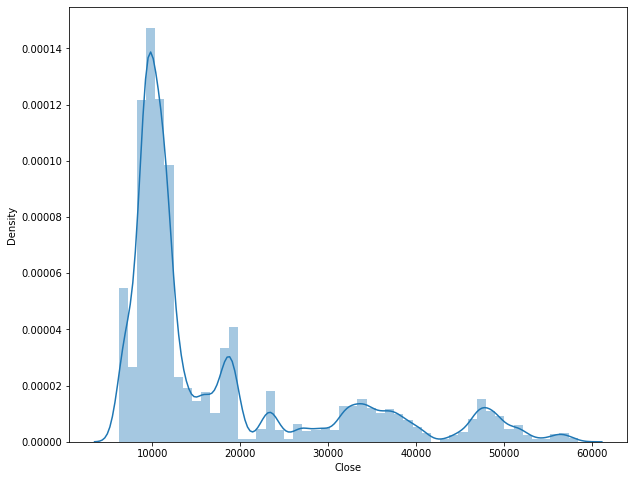

In [136]:
#visualizando a distribuição com histograma
plt.figure(figsize=[10,8])
sns.distplot(df_rec_analise["Close"])

In [137]:
#variação entre abertura e fechamento
var_abert_fech=df_rec_analise["Close"]-df_rec_analise["Open"]

In [138]:
var_abert_fech

4331776   -11.30
4331777     5.86
4331778    15.95
4331779     9.00
4331780    12.42
           ...  
4821510   -38.28
4821511    29.21
4821512    58.82
4821513   -74.78
4821514    21.50
Length: 482164, dtype: float64

In [139]:
#variação percentual
var_perc=var_abert_fech/100

In [140]:
var_perc

4331776   -0.1130
4331777    0.0586
4331778    0.1595
4331779    0.0900
4331780    0.1242
            ...  
4821510   -0.3828
4821511    0.2921
4821512    0.5882
4821513   -0.7478
4821514    0.2150
Length: 482164, dtype: float64

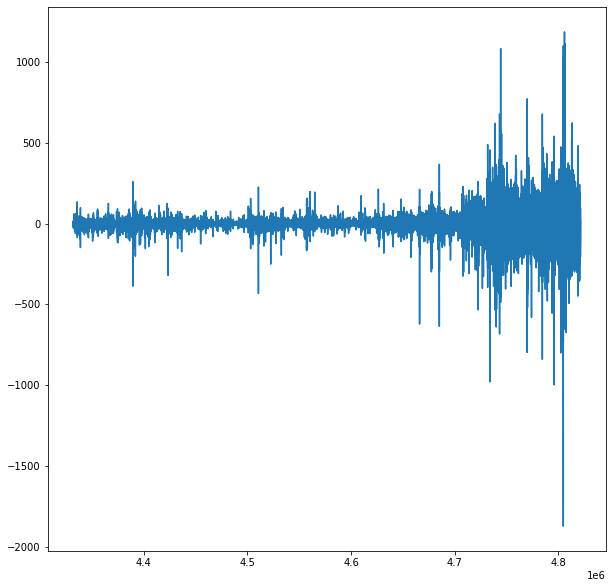

In [141]:
var_abert_fech.plot(figsize=[10,10])

In [142]:
#variações pequenas em janelas curtas são mais frequentes
var_abert_fech.value_counts()

 0.00      28140
 0.01       1527
-0.01       1101
 0.02        820
-0.02        493
           ...  
-148.12        1
-35.85         1
-40.71         1
-91.94         1
-176.67        1
Length: 54279, dtype: int64

In [143]:
df_rec_analise.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

##Volume_(BTC)

Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.





In [144]:
df_rec_analise["Volume_(BTC)"]

4331776     0.369580
4331777     4.053499
4331778    18.707374
4331779     7.164653
4331780     9.050250
             ...    
4821510     0.747287
4821511     0.846486
4821512     0.503095
4821513     0.976677
4821514     0.828068
Name: Volume_(BTC), Length: 482164, dtype: float64

In [145]:
#informações estatísticas iniciais
df_rec_analise["Volume_(BTC)"].describe()

count    482164.000000
mean          6.126882
std          15.292625
min           0.000002
25%           0.485906
50%           1.973613
75%           5.889323
max        1098.349384
Name: Volume_(BTC), dtype: float64

In [146]:
#tipo do dado
df_rec_analise["Volume_(BTC)"].dtypes

dtype('float64')

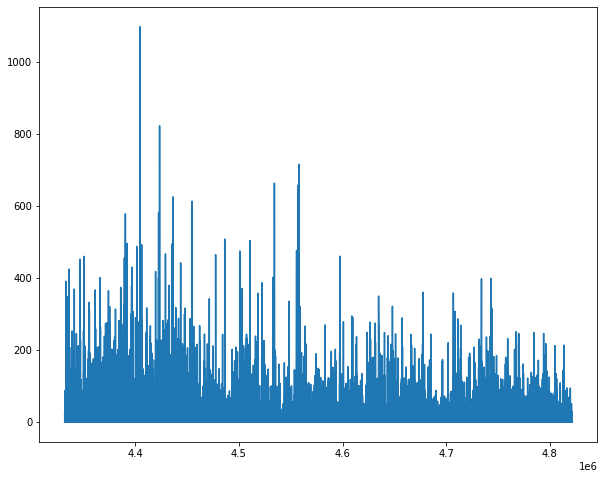

In [147]:
plt.figure(figsize=[10,8])
df_rec_analise["Volume_(BTC)"].plot()

In [148]:
#volumes relativamente pequenos foram mais comuns
df_rec_analise["Volume_(BTC)"].value_counts()

0.010000     147
1.000000     146
0.020000     101
0.100000      88
2.000000      87
            ... 
2.061634       1
1.421413       1
5.869390       1
11.305162      1
8.052393       1
Name: Volume_(BTC), Length: 476790, dtype: int64

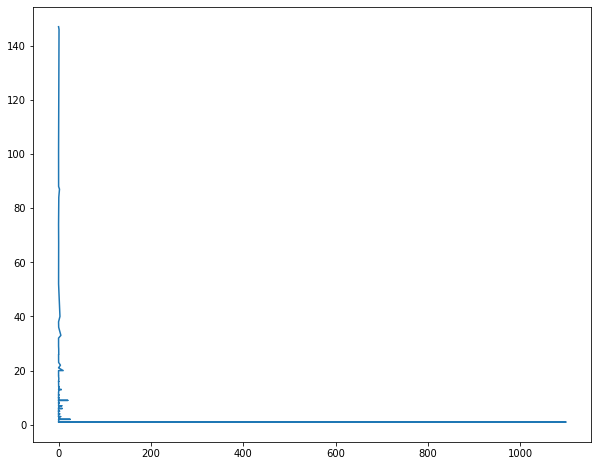

In [149]:
plt.figure(figsize=[10,8])
df_rec_analise["Volume_(BTC)"].value_counts().plot()

In [150]:
#em ordem crescente
df_rec_analise["Volume_(BTC)"].sort_values()

4762441       0.000002
4359213       0.000002
4350187       0.000003
4350263       0.000003
4412961       0.000003
              ...     
4557162     658.190065
4534231     663.636053
4557827     716.184407
4423382     822.866974
4404691    1098.349384
Name: Volume_(BTC), Length: 482164, dtype: float64

##Nota:
  O volume será maior quanto mais transações forem feitas.

##OBV - On Balance Volume

**Se o fechamento de hoje for superior ao de ontem**, então: OBV = OBV de ontem + Volume de hoje

**Se o volume de hoje for inferior ao de ontem, então**: OBV = OBV de ontem – Volume de hoje

**Se o fechamento de hoje for igual ao de ontem, então**: OBV = OBV de ontem

In [160]:
#Cálculo do OBV e nova feature
df_rec_analise["OBV"]=np.where(df_rec_analise["Close"] > df_rec_analise["Close"].shift(1), +df_rec_analise["Volume_(BTC)"],
                               np.where(df_rec_analise["Close"] < df_rec_analise["Close"].shift(1), -df_rec_analise["Volume_(BTC)"], 0)).cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
df_rec_analise["OBV"]

4331776       0.000000
4331777       4.053499
4331778      22.760873
4331779      29.925526
4331780      38.975776
              ...     
4821510   -1961.422156
4821511   -1960.575670
4821512   -1960.072574
4821513   -1961.049251
4821514   -1960.221182
Name: OBV, Length: 482164, dtype: float64

In [164]:
df_rec_analise["OBV"].describe()

count    482164.000000
mean      -3102.371679
std        5802.430031
min      -15121.668399
25%       -6728.322330
50%       -3399.708805
75%         241.339062
max       14297.930053
Name: OBV, dtype: float64

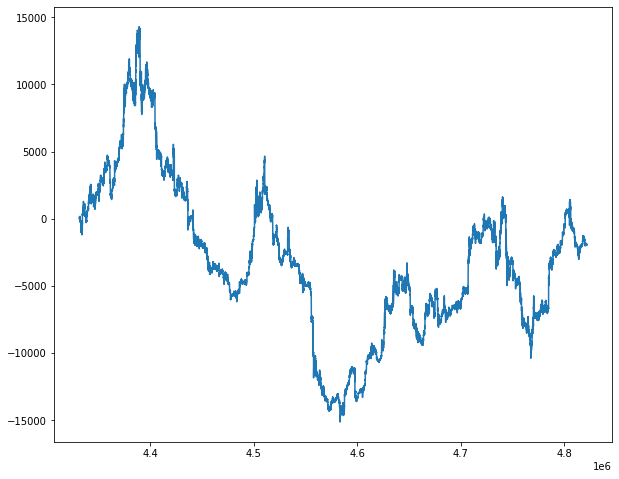

In [162]:
plt.figure(figsize=[10,8])
df_rec_analise["OBV"].plot()

In [163]:
df_rec_analise

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,OBV
4331776,2020-03-31 00:00:00,6408.95,6408.95,6397.52,6397.65,0.369580,2366.046893,6401.994344,0.000000
4331777,2020-03-31 00:01:00,6399.20,6406.06,6398.80,6405.06,4.053499,25960.527673,6404.473810,4.053499
4331778,2020-03-31 00:02:00,6409.05,6425.24,6409.05,6425.00,18.707374,120144.266210,6422.294481,22.760873
4331779,2020-03-31 00:03:00,6417.53,6430.74,6417.53,6426.53,7.164653,46043.367355,6426.461704,29.925526
4331780,2020-03-31 00:04:00,6426.54,6438.96,6424.46,6438.96,9.050250,58225.624105,6433.592825,38.975776
...,...,...,...,...,...,...,...,...,...
4821510,2021-03-06 02:14:00,48399.55,48399.55,48361.27,48361.27,0.747287,36140.226989,48361.913705,-1961.422156
4821511,2021-03-06 02:15:00,48362.00,48396.43,48362.00,48391.21,0.846486,40949.758889,48376.167174,-1960.575670
4821512,2021-03-06 02:16:00,48383.17,48447.21,48383.17,48441.99,0.503095,24370.418563,48440.942159,-1960.072574
4821513,2021-03-06 02:17:00,48459.00,48462.50,48377.55,48384.22,0.976677,47291.371758,48420.705795,-1961.049251
